# Подбор гиперпараметров для алгоритма LogisticRegression на примере Breast Cancer Data

Для начала работы загруим необходимые библиотеки и инструменты 

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, GridSearchCV, RandomizedSearchCV, train_test_split, cross_validate
from scipy.stats import uniform,loguniform
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import rcParams
import mglearn
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, classification_report, f1_score
from scipy.optimize import fmin
from time import time

# 1. Оптимизация гипрпараметра C

## 1.1. fmin optimization

В качестве рабочего набора данных будет использован встроенный набор данных breast_cancer, содержащий в себе 569 записей и информацию по 9 признакам. Для каждого из этих признаков были рассчитаны среднее значение, стандартная ошибка и «наихудшее» или наибольшее (среднее из трех самых больших значений) значение, что дало 30 признаков. Каждая из записей данных имеет метку Malignant (злокачественная опухоль) (212 записей) или Benign(доброкачественная опухоль) (357).

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer_data = pd.DataFrame.from_dict(cancer['data'])
cancer_target = pd.DataFrame.from_dict(cancer['target'])

# add intercept
cancer_data.insert(0, 'x_0', 1)

print("cancer_data", cancer_data.shape)
print("cancer_target",cancer_target.shape)
print()

# split to train and test sets
X_train = cancer_data[0:457]
y_train = cancer_target [0:457]
X_test = cancer_data[457:]
y_test = cancer_target [457:]

print("Shape X_train", X_train.shape)
print("Shape y_train", y_train.shape)
print()
print("Shape X_test", X_test.shape)
print("Shape y_test", y_test.shape)

cancer_data (569, 31)
cancer_target (569, 1)

Shape X_train (457, 31)
Shape y_train (457, 1)

Shape X_test (112, 31)
Shape y_test (112, 1)


In [5]:
# create arrays
X_train1 = np.array(X_train.values)
y_train1 = np.array(y_train.values)
X_test1 = np.array(X_test.values)
y_test1 = np.array(y_test.values)

# initialise w - vector of parameters
w = np.ones(31)

In [6]:
# hypothesis function for logistic regression

$$\large h_{w}{(x)} = \frac{1}{1+ e^{-w^Tx}}
$$

In [7]:
# the linear regression's cost function cannot be used in logistic regression problems

$$ \large \ J{(w)} = \frac{1}{m}\sum_{i=1}^m \frac{1}{2} ((h_{w}{(x^i)}) - y^i)^2
$$

$$ \large \ Cost(h_{w}{(x^{(i)})},{y^{(i)}}) = \frac{1}{2}(h_{w}{(x^{(i)})} - y^{(i)})^2
$$

$$ \large \ J{(w)} = \frac{1}{m}\sum_{i=1}^m Cost(h_{w}{(x^{(i)})},{y^{(i)}})
$$

In [8]:
# Logistic regression cost function


$$\large \
\begin{equation}
  Cost(h_{w}{(x)},{y})=\begin{cases}
    -log(h_{w}{(x)}), & \text{if $y = 1$}.\\
    -log(1 - h_{w}{(x)}), & \text{if $y = 0$}.
  \end{cases}
\end{equation}
$$




In [9]:
# formula without if/else statements 


$$\large \
\begin{equation}
  Cost(h_{w}{(x)},{y})= -ylog(h_{w}{(x)})-(1-y)(log(1 - h_{w}{(x)})
\end{equation}
$$

In [10]:
# define Cost Function for logistic regression with L2 regularization wich we should minimize

$$  J{(w)} = \frac{1}{m}\sum_{i=1}^m Cost(h_{w}{(x^{(i)})},{y^{(i)}}) = -[\frac{1}{m}\sum_{i=1}^m y^{(i)} log(\frac{1}{1+ e^{-w^Tx}})+(1-y^{(i)})log(1 - \frac{1}{1+ e^{-w^Tx}})] + \frac{\lambda}{2m}\sum_{j=1}^n w^2_j 
$$



 $ m  - \text{number of training examples}$  $n - \text {number of features }$  $x - \text{input variable/features }$ $y - \text{output variable/ target variable}$ $w - \text{parameters of the model }$ $ \lambda - \text{parameter of regularization}$ 

In [11]:
def cost_function_L2_penalty(w,X,y,learningRate):
    
    w = np.matrix(w)
    X = np.matrix(X)
    y = np.matrix(y)
    
    lg = np.log(1/(1 + np.exp(-X*w.T)))
    
    first = np.multiply(-y, lg)
    second = np.multiply((1-y), lg)
    
    penalty = learningRate/(2*len(X))*np.sum(w*w.T)
    
    return np.sum(first - second)/(len(X)) + penalty

In [12]:
learningRate = 1 # LearningRate is alpha = 1 / (n_samples * C)
cost_function_L2_penalty(w,X_train1,y_train1,learningRate)

0.03391684901531729

In [13]:
w_new = fmin(func = cost_function_L2_penalty, x0 = w, args=(X_train1,y_train1,learningRate), maxiter=100)
print(w_new)

[0.99740871 0.98382111 1.03154298 1.0352815  1.03425103 1.00777605
 0.98870541 1.0371062  1.00616981 0.9779672  0.99311712 0.9312597
 0.95998774 1.03402172 0.95327126 0.96552775 0.9855948  0.97447227
 1.01147925 0.98105309 0.99526063 1.01357562 0.99094533 1.01824129
 1.0234979  1.00954558 0.98634959 1.0158313  1.01906068 1.02079928
 0.94900147]


In [14]:
fmin(func = cost_function_L2_penalty, x0 = 0, args=(w_new, X_train1,y_train1,), maxiter=100)

ValueError: shapes (1,31) and (1,1) not aligned: 31 (dim 1) != 1 (dim 0)

## 1.2. Grid Search optimization

### 1.2.1. RandomizedSearchCV (C = [10^-4, 10^0])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

import warnings
warnings.filterwarnings("ignore")

RandomizedSearchCV took 15.47 seconds for 100 candidates


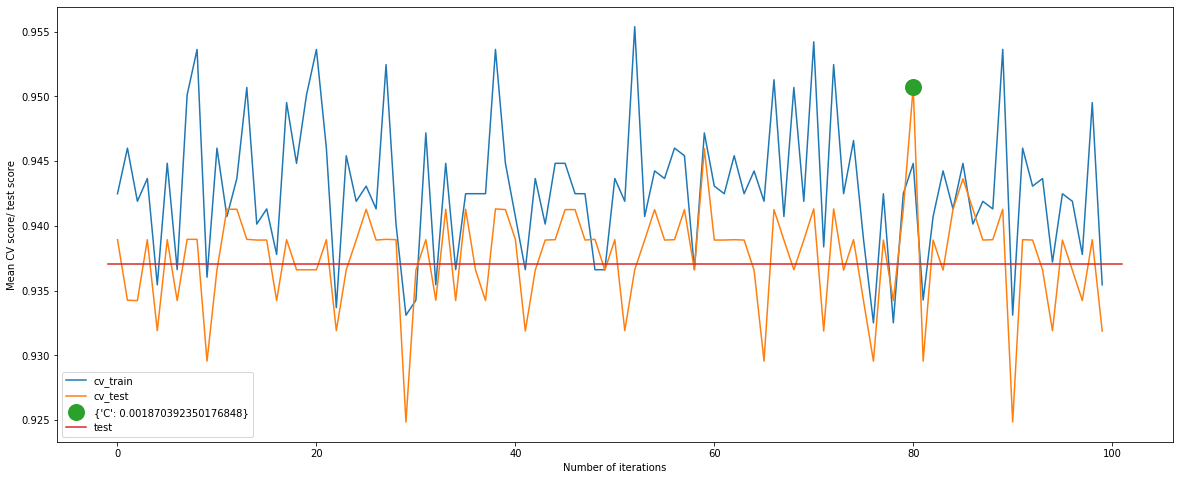

In [16]:
param_grid_log =  {'C': loguniform(10**(-4),10**0)}
random_search_log = RandomizedSearchCV(LogisticRegression(),param_distributions = param_grid_log, 
                                   n_iter = 100, cv = 5,return_train_score=True, random_state = 0)
start = time()
random_search_log.fit(X_train,y_train)

print("RandomizedSearchCV took {:.2f} seconds for {} candidates".format((time() - start),random_search_log.n_iter))

best_C = random_search_log.best_params_
num_iter = random_search_log.n_iter
best_point = random_search_log.best_index_

cv_train_mean_scores = random_search_log.cv_results_['mean_train_score']
cv_test_mean_scores = random_search_log.cv_results_['mean_test_score']
test_score = random_search_log.score(X_test,y_test)

rcParams['figure.figsize'] = 20, 8
plt.plot(np.arange(0,num_iter,1), cv_train_mean_scores, label = 'cv_train')
plt.plot(np.arange(0,num_iter,1), cv_test_mean_scores, label = 'cv_test')
plt.plot(np.arange(0,num_iter,1)[best_point], cv_test_mean_scores[best_point], 'o',markersize=15, mew = 2,
         label = '{}'.format(best_C))
plt.plot([-1,num_iter+1], [test_score,test_score], label = 'test')
plt.xlabel('Number of iterations')
plt.ylabel('Mean CV score/ test score')
plt.legend(loc = 'best')
plt.show()

In [17]:
print("Best parameter {}".format(best_C))
print('Средняя правильность на тренировочном наборе при CrossValidation: {:.2f}'.format(np.mean(cv_train_mean_scores)))
print('Средняя правильность на тестовом наборе при CrossValidation: {:.2f}'.format(np.mean(cv_test_mean_scores)))
print('Правильность на тестовом наборе: {:.2f}'.format(test_score))

Best parameter {'C': 0.001870392350176848}
Средняя правильность на тренировочном наборе при CrossValidation: 0.94
Средняя правильность на тестовом наборе при CrossValidation: 0.94
Правильность на тестовом наборе: 0.94


### 1.2.2. GridSearchCV (C = [10^-4, 10^0])

GridSearchCV took 15.16 seconds for 100 candidates


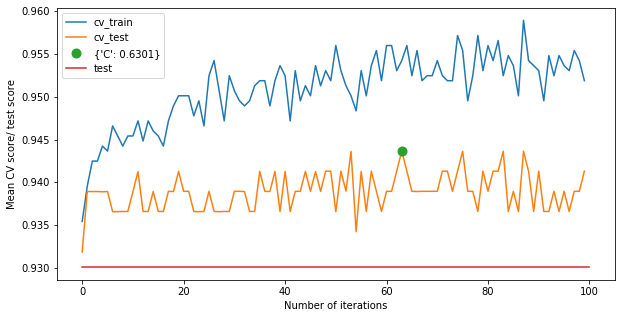

In [18]:
param_grid = {'C': np.arange(10**(-4),10**0,0.01)}

grid_search = GridSearchCV(LogisticRegression(), param_grid, return_train_score=True)
start = time()
grid_search.fit(X_train,y_train)
print("GridSearchCV took {:.2f} seconds for {} candidates".format((time() - start),
                                                                  len(grid_search.cv_results_['params'])))

best_C = grid_search.best_params_
num_iter = len(grid_search.cv_results_['params'])
best_point = grid_search.best_index_

cv_train_mean_scores = grid_search.cv_results_['mean_train_score']
cv_test_mean_scores = grid_search.cv_results_['mean_test_score']
test_score = grid_search.score(X_test,y_test)

rcParams['figure.figsize'] = 10, 5
plt.plot(np.arange(0,num_iter,1), cv_train_mean_scores, label = 'cv_train')
plt.plot(np.arange(0,num_iter,1), cv_test_mean_scores, label = 'cv_test')
plt.plot(np.arange(0,num_iter,1)[best_point], cv_test_mean_scores[best_point], 'o',markersize=8, mew = 2,
         label = '{}'.format(best_C))
plt.plot([0,num_iter], [test_score,test_score], label = 'test')
plt.xlabel('Number of iterations')
plt.ylabel('Mean CV score/ test score')
plt.legend(loc = 'best')
plt.show()

In [19]:
print("Best parameter {}".format(best_C))
print('Средняя правильность на тренировочном наборе при CrossValidation: {:.2f}'.format(np.mean(cv_train_mean_scores)))
print('Средняя правильность на тестовом наборе при CrossValidation: {:.2f}'.format(np.mean(cv_test_mean_scores)))
print('Правильность на тестовом наборе: {:.2f}'.format(test_score))

Best parameter {'C': 0.6301}
Средняя правильность на тренировочном наборе при CrossValidation: 0.95
Средняя правильность на тестовом наборе при CrossValidation: 0.94
Правильность на тестовом наборе: 0.93


### 1.2.3. Best estimators GridSearchCV and RandomizedSearchCV (C = [10^-4, 10^0])

In [20]:
print(grid_search.best_estimator_)
print()
print(random_search_log.best_estimator_)

LogisticRegression(C=0.6301, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.001870392350176848, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


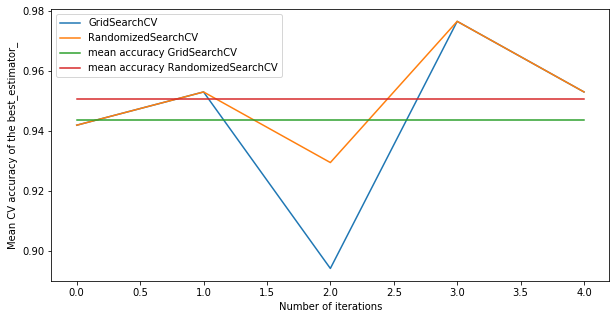

In [21]:
GridS = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
RandS = cross_val_score(random_search_log.best_estimator_, X_train, y_train, cv=5)
rcParams['figure.figsize'] = 10, 5
plt.plot(np.arange(0,len(GridS),1), GridS, label = 'GridSearchCV')
plt.plot(np.arange(0,len(RandS),1), RandS, label = 'RandomizedSearchCV')

plt.plot([0,len(GridS)-1], [np.mean(GridS),np.mean(GridS)], label = 'mean accuracy GridSearchCV')
plt.plot([0,len(RandS)-1], [np.mean(RandS),np.mean(RandS)], label = 'mean accuracy RandomizedSearchCV')


plt.xlabel('Number of iterations')
plt.ylabel('Mean CV accuracy of the best_estimator_')
plt.legend(loc = 'best')
plt.show()

In [22]:
print('Правильность CV для GridSearchCV ={:.2f}, RandomizedSearchCV ={:.2f}'. format(np.mean(GridS),np.mean(RandS)))

Правильность CV для GridSearchCV =0.94, RandomizedSearchCV =0.95


In [23]:
#Разбивка данных на обчающий, проверочный и тестовый наборы

X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                         stratify = cancer.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,y_trainval, random_state = 0)

# 2. Feature importance

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

## 2.1. Feature importance for Decision Tree

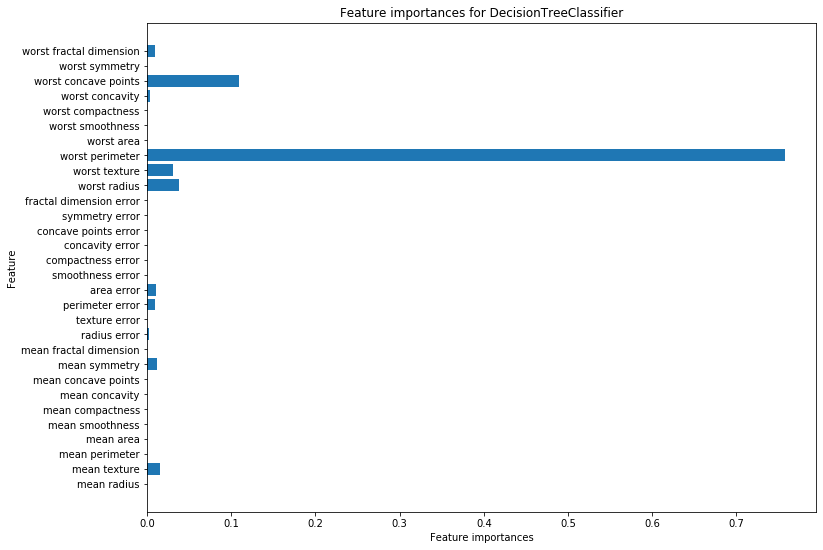

In [25]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

rcParams['figure.figsize'] = 12, 9    
n_reatures = cancer.data.shape[1]
plt.barh(range(n_reatures), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_reatures), cancer.feature_names)
plt.xlabel('Feature importances')
plt.ylabel('Feature')
plt.title("Feature importances for DecisionTreeClassifier")
plt.show()

In [26]:
top_features_dt = ['worst concave points','worst perimeter','worst texture', 'worst radius','mean texture']

## 2.2. Feature importance for Logistic Regression

### 2.2.1. Feature importance for Logistic Regression with using the coefficient value from cost function equation (without using sklearn methods)

Top features ['mean radius' 'mean texture' 'mean perimeter' 'texture error'
 'perimeter error' 'worst radius']


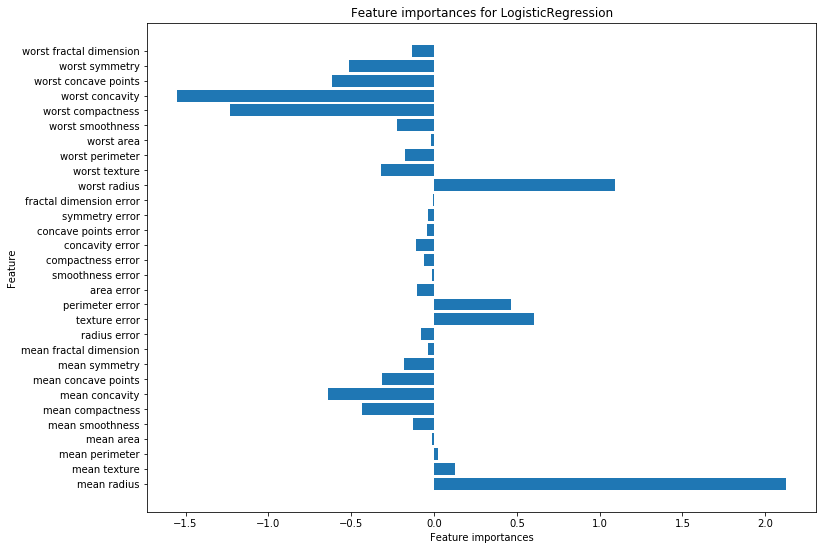

In [27]:
log_reg = LogisticRegression(fit_intercept = False, max_iter= 1000)
log_reg.fit(X_train,y_train)

# The higher the coefficient, the higher the “importance” of a feature.

top_features_coeff = cancer.feature_names[log_reg.coef_.reshape(n_reatures)>0]
print("Top features", top_features_coeff)
n_reatures = cancer.data.shape[1]
plt.barh(range(n_reatures), log_reg.coef_.reshape(n_reatures), align='center')
plt.yticks(np.arange(n_reatures), cancer.feature_names)
plt.xlabel('Feature importances')
plt.ylabel('Feature')
plt.title("Feature importances for LogisticRegression")
plt.show()

### 2.2.2. Feature importance for Logistic Regression with Recursive Feature Elimination (RFE)

In [28]:
from sklearn.feature_selection import RFE

# the 5 most informative features 
selector = RFE(log_reg, 5,step=1)
selector.fit(X_train,y_train)
top_features_rfe = cancer.feature_names[selector.ranking_ == 1]
print("Top 5 features",top_features_rfe)

Top 5 features ['mean concavity' 'mean concave points' 'mean symmetry' 'worst concavity'
 'worst concave points']


### 2.2.3. Feature importance for Logistic Regression with selecting features based on importance weights (with using sklearn method)

In [29]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(log_reg, threshold=-np.inf, max_features=5)
sfm.fit(X_train,y_train)
index = sfm.get_support()
top_features_sfm = cancer.feature_names[index]
print("Top 5 features", top_features_sfm)

Top 5 features ['mean radius' 'mean concavity' 'worst radius' 'worst compactness'
 'worst concavity']


## 2.3. Results for the feature importance 

In [30]:
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
X_coeff = np.array(data[top_features_coeff].values)
X_rfe = np.array(data[top_features_rfe].values)
X_sfm = np.array(data[top_features_sfm].values)
X_dt = np.array(data[top_features_dt].values)


X_train_coeff, X_test_coeff, y_train_coeff, y_test_coeff = train_test_split(X_coeff, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

X_train_sfm, X_test_sfm, y_train_sfm, y_test_sfm = train_test_split(X_sfm, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)
print('LogisticRegression')
log_reg.fit(X_train,y_train)
print("Original Logistic Regression: number of features {}, auc = {:.4f}".format(X_train.shape[1], 
                                                   roc_auc_score(y_test, log_reg.decision_function(X_test))))
log_reg.fit(X_train_coeff,y_train_coeff)
print("Coefficient Ranking Method: number of features {}, auc = {:.4f}".format(X_train_coeff.shape[1], 
                                                   roc_auc_score(y_test_coeff, log_reg.decision_function(X_test_coeff))))
log_reg.fit(X_train_rfe,y_train_rfe)
print("RFE: number of features {}, auc = {:.4f}".format(X_train_rfe.shape[1], 
                                                   roc_auc_score(y_test_rfe, log_reg.decision_function(X_test_rfe))))
log_reg.fit(X_train_sfm,y_train_sfm)
print("SFM: number of features {}, auc = {:.4f}".format(X_train_rfe.shape[1], 
                                                   roc_auc_score(y_test_sfm, log_reg.decision_function(X_test_sfm))))
print()
print('DecisionTreeClassifier')
tree.fit(X_train,y_train)
print("Original DecisionTreeClassifier: number of features {}, auc = {:.4f}".format(X_train.shape[1], 
                                                   roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])))
tree.fit(X_train_dt,y_train_dt)
print("DecisionTreeClassifier feature_importances_: number of features {}, auc = {:.4f}".format(X_train_dt.shape[1], 
                                                   roc_auc_score(y_test_dt, tree.predict_proba(X_test_dt)[:,1])))

LogisticRegression
Original Logistic Regression: number of features 30, auc = 0.9925
Coefficient Ranking Method: number of features 6, auc = 0.9396
RFE: number of features 5, auc = 0.9006
SFM: number of features 5, auc = 0.9396

DecisionTreeClassifier
Original DecisionTreeClassifier: number of features 30, auc = 0.9299
DecisionTreeClassifier feature_importances_: number of features 5, auc = 0.9520


# 3. k-folds Cross Validation

Рассмотрим, как на показатель правильности влияет количество блоков, на которые разбиваются тренировочные данные при кросс валидации.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

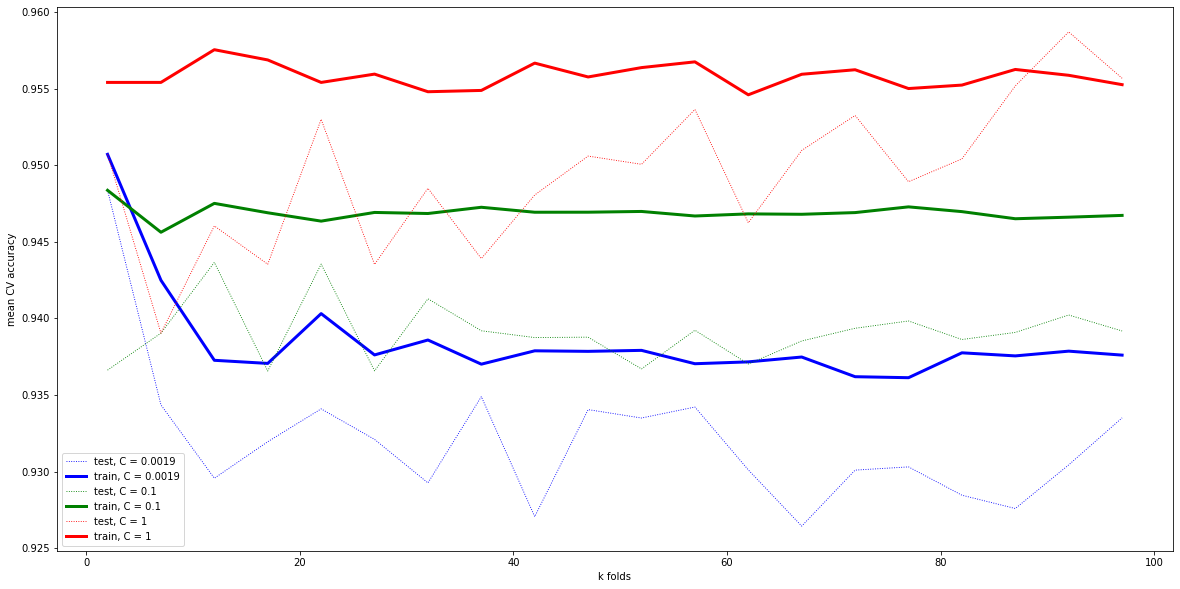

In [32]:
folds = np.arange(2,102,5)
rcParams['figure.figsize'] = 20, 10
for c,col in zip([0.0019, 0.1,1],['b','g','r']):
    mean_test_score_cv = []
    mean_train_score_cv = []

    for k in folds:
        kf = KFold(n_splits=k)
        log_reg = LogisticRegression(C = c)
        log_reg_CV = cross_validate(log_reg, X_train, y_train, cv = kf, return_train_score = True)
        test_score_cv = list(log_reg_CV.items())[2][1]
        train_score_cv = list(log_reg_CV.items())[3][1]
        mean_test_score_cv.append(np.mean(test_score_cv))
        mean_train_score_cv.append(np.mean(train_score_cv))
    
        
    plt.plot(folds, mean_test_score_cv, label = 'test, C = {}'.format(c),linestyle='dotted', c = col,linewidth = 0.9)
    plt.plot(folds, mean_train_score_cv, label = 'train, C = {}'.format(c), c = col, linewidth = 3)
    plt.legend(loc = 'best')
plt.xlabel('k folds')
plt.ylabel('mean CV accuracy')
plt.show()

## 3.1. LeaveOneOut CV

Для осуществления перекрестной проверки с исключением по одному в sklearn есть специальный метод.

In [33]:
X_train.shape # k = 426

(426, 30)

In [34]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
log_reg = LogisticRegression(C = 1)
cv_model = cross_validate(log_reg, X_train,y_train, cv=loo,return_train_score = True)
mean_train = np.mean(list(cv_model.items())[2][1])
mean_test = np.mean(list(cv_model.items())[3][1])

print("Средняя правильность test set: {:.3f}".format(mean_test))
print("Средняя правильность train set: {:.3f}".format(mean_train))     

Средняя правильность test set: 0.956
Средняя правильность train set: 0.951


# 4. Установка порогового значения по вероятности

Изначально порог принятия реения для решающей функции задан 0: 

* при значении решающей функции < 0, объект относится к классу 0

* при значении решающей функции > 0, объект относится к классу 1


Для вероятности установлен порог принятия решений = 0.5:

* при вероятности < 0.5, объект относится к классу 0 (модель уверена меньше)
* при вероятности > 0.5, объект относится к классу 1 (модель уверена больше)

Эти параметры можно менять для оптимизации модели под требования бизнес задачи.

В исследуемом наборе имеется 2 класса: 
* 'malignant' = 0 (злокачественные опухоли) 
* 'benign' = 1 (доброкачественные опухоли) 

Поставим перед собой следующую задачу: минимизировать долю ложно-положительных результатов, т.е. тех случаев, когда алгоритм предсказывает, что опухоль яв-ся доброкачественной (1), а на самом деле опухоль яв-ся злокачественной (0). В таком случае мы хотим быть уверены, что те пациенты, у кого высокая вероятность доброкачественной опухоли, буду определены алгоритмом точно. Тогда модель должна иметь бОльший порог уверенности, относя пациента к классу 1 и стремиться к 100%  точности в этм классе.

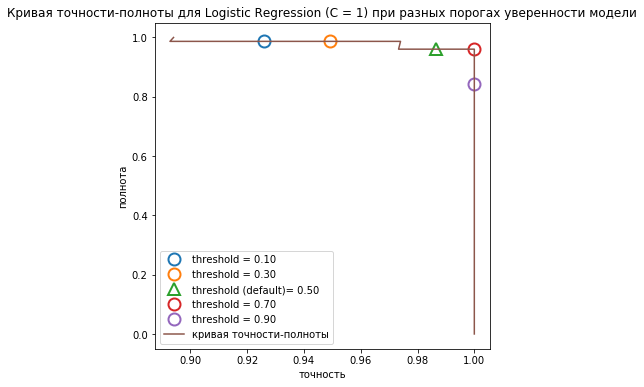

In [35]:
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                         stratify = cancer.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,y_trainval, random_state = 0)

# изначально порог на decision_function = 0, redict_proba = 0.5

log_reg = LogisticRegression(C = 1) 
log_reg.fit(X_train, y_train) 

precision, recall, tresholds = precision_recall_curve(y_valid, log_reg.predict_proba(X_valid)[:,1])

rcParams['figure.figsize'] = 6, 6
for i in np.arange(0.1,1,0.2):
    if round(i,1) == 0.5:
        close_point = np.argmin(np.abs(tresholds - i))
        plt.plot(precision[close_point], recall[close_point], '^',
                 markersize=12, label="threshold (default)= {:.2f}".format(i), fillstyle="none", mew=2) 
    else:
        close_point = np.argmin(np.abs(tresholds - i))
        plt.plot(precision[close_point], recall[close_point], 'o',
             markersize=12, label="threshold = {:.2f}".format(i), fillstyle="none", mew=2) 
    
plt.plot(precision, recall, label = 'кривая точности-полноты')
plt.xlabel('точность')
plt.ylabel('полнота')
plt.title('Кривая точности-полноты для Logistic Regression (C = 1) при разных порогах уверенности модели')
plt.legend(loc = 'best')
plt.show()

Выведем сводку по показателям точности, полноты и их гармонического среднего (f-меры).

Видим, что алгоритм очень хорошо (100%) определяет пациентов с доброкачественной опухолью и отлично выявляет всех больных пациентов.

In [36]:
print('tresholds = 0.5')
print(classification_report(y_valid,log_reg.predict(X_valid))) 
print()
print('tresholds = 0.7')
y_pred_rise_threshold = log_reg.predict_proba(X_valid) >= 0.7
print(classification_report(y_valid,y_pred_rise_threshold[:,1]))

tresholds = 0.5
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.96      0.98        76

    accuracy                           0.97       107
   macro avg       0.96      0.98      0.97       107
weighted avg       0.97      0.97      0.97       107


tresholds = 0.7
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.95      0.97        76

    accuracy                           0.96       107
   macro avg       0.94      0.97      0.96       107
weighted avg       0.97      0.96      0.96       107



При значении порога вероятности равному 0.5 модель дает самые лучшие показатели

## 4.1. Зависиомсть f1 и точности от величины порога принятия решения

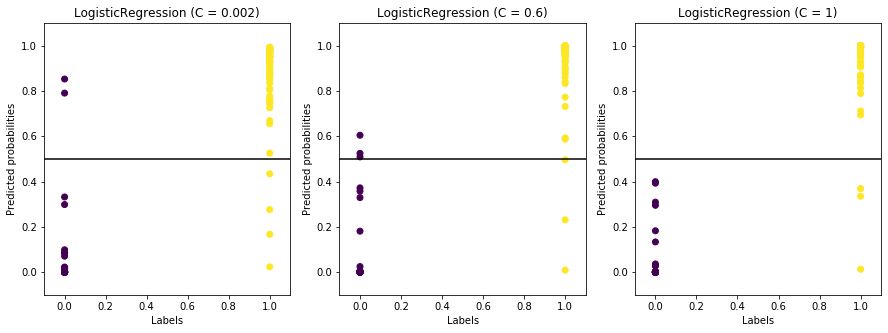

In [37]:
# порог T: все объекты, имеющие предсказание выше порога, относят к классу 1, остальные - к классу 0.
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for c, ax in zip([0.002, 0.6, 1], axes):
    
    log_reg = LogisticRegression(C = c).fit(X_train,y_train)
    predicted = log_reg.predict_proba(X_valid)[:,1]
    actual = y_valid
    ax.scatter(actual,predicted, c = actual)
    ax.plot([-0.1, 1.1], [0.5, 0.5], c = 'black') # уровень порога
    ax.axis([-0.1, 1.1, -0.1, 1.1])
    ax.set_title("LogisticRegression (C = {})".format(c))
    ax.set_xlabel("Labels")
    ax.set_ylabel("Predicted probabilities")

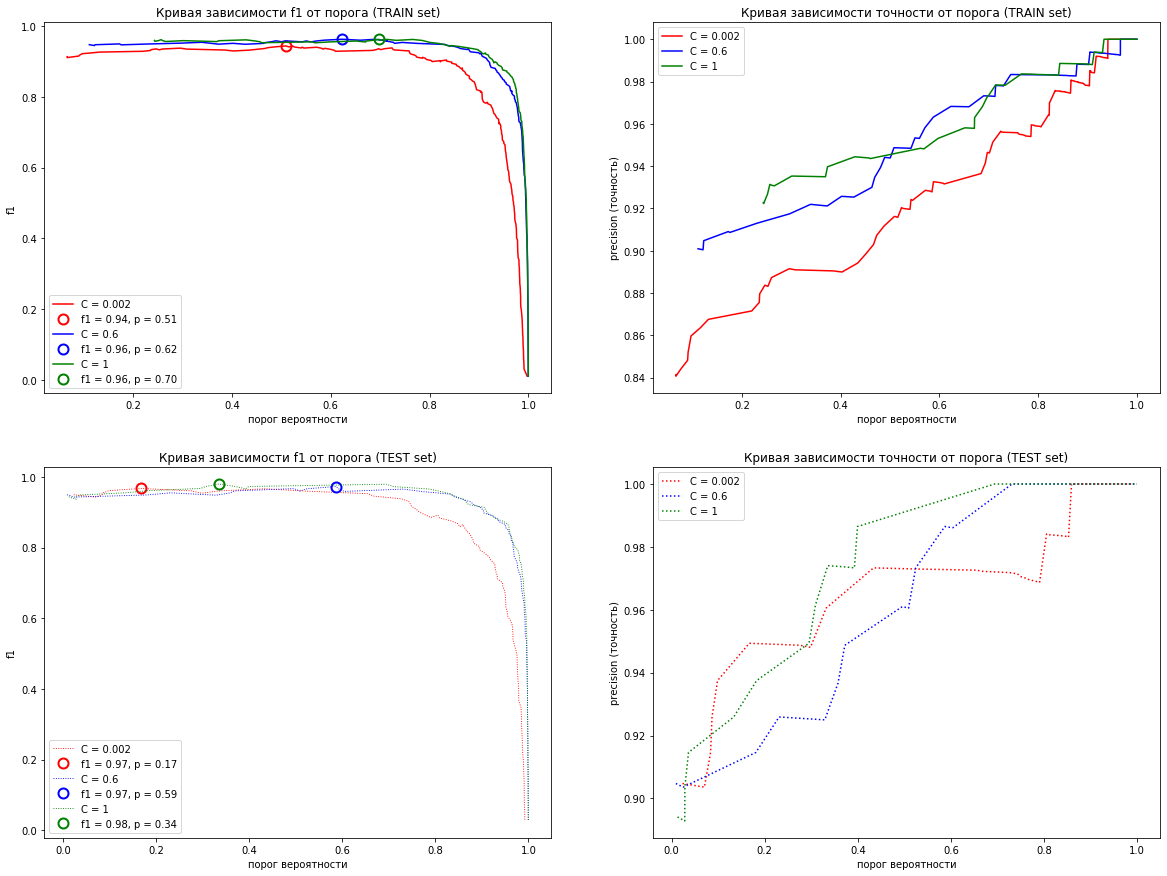

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15)) 

for c, col in zip([0.002, 0.6, 1], ['r','b','g']):
    log_reg = LogisticRegression(C = c).fit(X_train,y_train)
    
    precision_train, recall_train, tresholds_train = precision_recall_curve(y_train, log_reg.predict_proba(X_train)[:,1])
    precision, recall, tresholds = precision_recall_curve(y_valid, log_reg.predict_proba(X_valid)[:,1])
    
    f_scores = []
    f_scores_train = []
    for i in tresholds:
        y_pred_change_threshold = log_reg.predict_proba(X_valid) >= i
        f_scores.append(f1_score(y_valid,y_pred_change_threshold[:,1]))
    for t in tresholds_train:
        y_pred_change_threshold_train = log_reg.predict_proba(X_train) >= t
        f_scores_train.append(f1_score(y_train,y_pred_change_threshold_train[:,1]))   
        
    max_f1 = np.argmax(np.abs(f_scores))
    max_f1_train = np.argmax(np.abs(f_scores_train))
    
    axes[0][0].plot(tresholds_train, f_scores_train, label = 'C = {}'.format(c), c = col)
    axes[0][0].plot(tresholds_train[max_f1_train], f_scores_train[max_f1_train],'o', markersize=10, 
             label="f1 = {:.2f}, p = {:.2f}".format(f_scores_train[max_f1_train],tresholds_train[max_f1_train]), 
             fillstyle="none",mew=2, c = col)
    
    axes[1][0].plot(tresholds, f_scores, label = 'C = {}'.format(c), linestyle='dotted', c = col,linewidth = 0.9)
    axes[1][0].plot(tresholds[max_f1], f_scores[max_f1],'o', markersize=10, 
                    label="f1 = {:.2f}, p = {:.2f}".format(f_scores[max_f1],tresholds[max_f1]), 
                    fillstyle="none",mew=2, c = col)
    
    axes[0][0].set_title('Кривая зависимости f1 от порога (TRAIN set)')
    axes[1][0].set_title('Кривая зависимости f1 от порога (TEST set)')
    axes[0][0].set_xlabel('порог вероятности')
    axes[0][0].set_ylabel('f1')
    axes[0][0].legend(loc = 'best') 
    
    axes[1][0].set_xlabel('порог вероятности')
    axes[1][0].set_ylabel('f1')
    axes[1][0].legend(loc = 'best')
    
    max_precision = np.argmax(np.abs(precision))
    #max_precision_train = np.argmax(np.abs(precision_train))
    
    axes[0][1].plot(tresholds_train, precision_train[:-1], label = 'C = {}'.format(c), c = col)
    #axes[0][1].plot(tresholds_train[max_precision_train], precision_train[:-1][max_precision_train],'o', markersize=10, 
             #label="p = {:.2f}".format(tresholds_train[max_precision_train]), fillstyle="none",mew=2, c = col)
    
    axes[1][1].plot(tresholds, precision[:-1], label = 'C = {}'.format(c), linestyle='dotted', c = col)
    #axes[1][1].plot(tresholds[max_precision], precision[:-1][max_precision],'o', markersize=10, 
             #label="p = {:.2f}".format(tresholds[max_precision]), fillstyle="none",mew=2, c = col)
   
    axes[0][1].set_title('Кривая зависимости точности от порога (TRAIN set)' )
    axes[0][1].set_xlabel('порог вероятности')
    axes[0][1].set_ylabel('precision (точность)')
    axes[0][1].legend(loc = 'best')   
    
    axes[1][1].set_title('Кривая зависимости точности от порога (TEST set)' )
    axes[1][1].set_xlabel('порог вероятности')
    axes[1][1].set_ylabel('precision (точность)')
    axes[1][1].legend(loc = 'best') 
plt.show()

# 5. Размер контрольного множества

In [39]:
#Разбивка данных на обчающий и тестовый наборы с разной величиной контрольной выборки
def procent_of_test_size(control_sizes, data, target):
    scores = []
    data_strucrure = {'%_test_size': ['original'],  # формируем имена колонок
                      'train_size':[cancer.data.shape[0]],
                      'test_size': [cancer.data.shape[0]] , 
                      'mean': [round(np.mean(data))] , 
                      'var': [round(np.var(data))] ,
                      'score': [0]}
    df = pd.DataFrame(data_strucrure)        # создаем датафрейм 
      
    for size in control_sizes:
        train_size = 1 - size
        test_percent = size*100
        X_trainval, X_test, y_trainval, y_test = train_test_split(data, target, 
                                                                  stratify = target, 
                                                                  random_state = 0,
                                                                  test_size = size,
                                                                  train_size = train_size)
        train_size = X_trainval.shape 
        test_size = X_test.shape
        mean = np.mean(X_trainval)
        var = np.var(X_trainval)
    
        
        log_reg = LogisticRegression(C = 10.04)
        kf = KFold(n_splits=12)
        scor = cross_val_score(log_reg, X_trainval, y_trainval, cv = kf)
        score = np.mean(scor)
        scores.append(score)
    
    
        new_row = {'%_test_size': test_percent, 
                   'train_size': train_size[0], 
                   'test_size': test_size[0], 
                   'mean': round(mean,2), 
                   'var': round(var,2),
                   'score': round(score,3)}
        
        
        df = df.append(new_row, ignore_index=True)
    
    return df

In [40]:
control_sizes = np.arange(0.01,1,0.1)
cancer_data_df = procent_of_test_size(control_sizes,cancer.data, cancer.target )

In [41]:
print(cancer_data_df)

   %_test_size  train_size  test_size   mean       var  score
0     original       569.0      569.0  62.00  52120.00  0.000
1            1       563.0        6.0  61.92  52150.42  0.947
2           11       506.0       63.0  62.15  53072.78  0.943
3           21       449.0      120.0  61.81  52628.14  0.938
4           31       392.0      177.0  61.60  52321.65  0.962
5           41       335.0      234.0  62.02  53842.41  0.949
6           51       278.0      291.0  62.18  54637.40  0.949
7           61       221.0      348.0  62.29  55988.48  0.937
8           71       165.0      404.0  60.81  51975.95  0.934
9           81       108.0      461.0  60.17  52199.24  0.944
10          91        51.0      518.0  57.15  40691.82  0.942


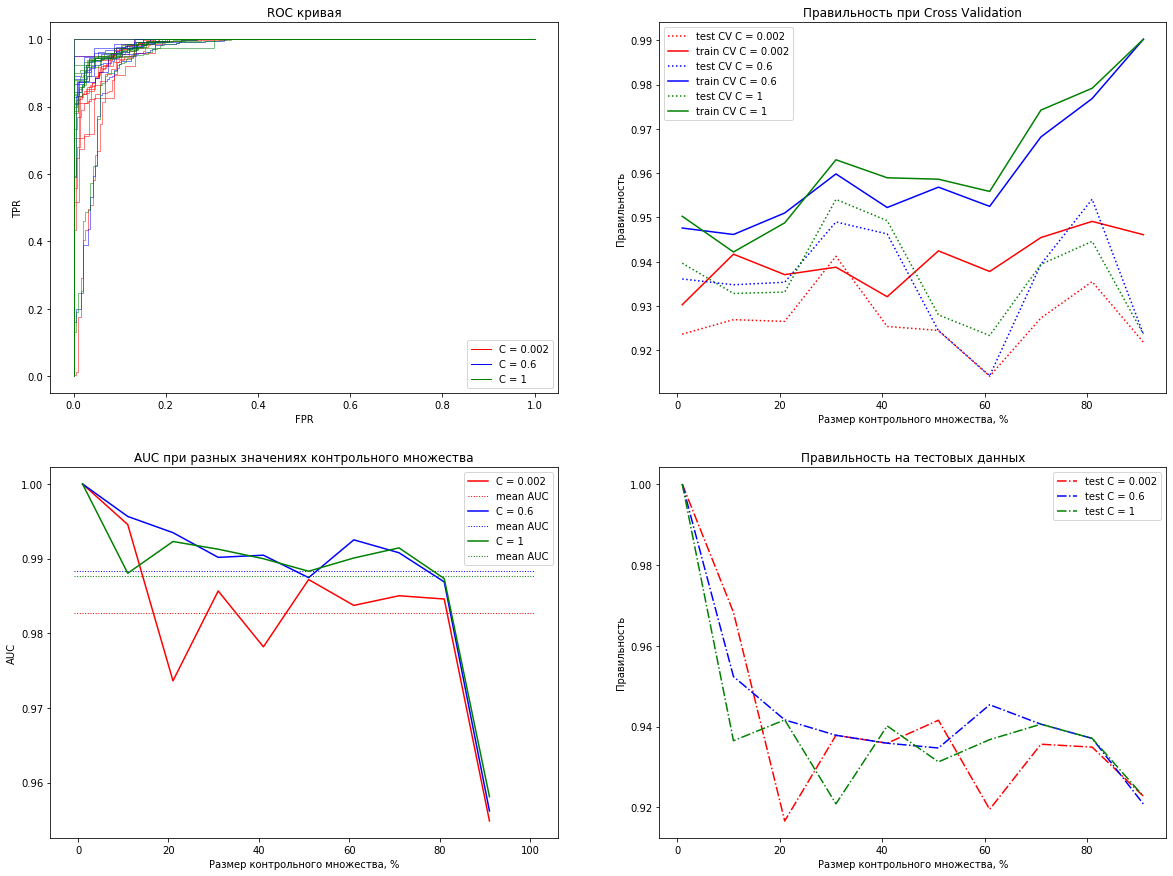

In [45]:
gridsize = (2,2)
fig = plt.figure(figsize=(20, 15))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 1))
ax4 = plt.subplot2grid(gridsize, (1, 0))

control_sizes = np.arange(0.01,1,0.1)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='r', lw=1),
               Line2D([0], [0], color='b', lw=1),
               Line2D([0], [0], color='g', lw=1)]

for c, col in zip([0.002, 0.6, 1],['r','b','g']):
    scores_test = []
    scores_train = []
    real_score = []
    auc_score = []
    for size in control_sizes:
        
        train_size = 1 - size
        test_percent = size*100
        X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                            stratify = cancer.target,
                                                            random_state = 0,
                                                            test_size = size, train_size = train_size)
        log_reg = LogisticRegression(C = c)
        kf = KFold(n_splits = 5)
        score = cross_validate(log_reg, X_train, y_train, cv = kf, return_train_score = True)
        train_score_cv = (list(score.items())[3][1])
        test_score_cv = (list(score.items())[2][1])
        scores_test.append(np.mean(test_score_cv))
        scores_train.append(np.mean(train_score_cv))
        log_reg.fit(X_train,y_train)
        real_score.append(log_reg.score(X_test,y_test))
        
        fpr,tpr, tresholds = roc_curve(y_test, log_reg.decision_function(X_test))
        ax1.plot(fpr,tpr,c = col,linewidth = 0.5)   
        
        auc = roc_auc_score(y_test, log_reg.decision_function(X_test))
        auc_score.append(auc)
    
        
    ax2.plot(control_sizes*100, scores_test, label = 'test CV C = {}'.format(c), c = col,linestyle='dotted')
    ax2.plot(control_sizes*100, scores_train, label = 'train CV C = {}'.format(c), c = col)
    ax3.plot(control_sizes*100, real_score, label = 'test C = {}'.format(c), c = col, linestyle = 'dashdot')
    ax4.plot(control_sizes*100, auc_score, label = 'C = {}'.format(c), c = col)
    ax4.plot((-1,101), (np.mean(auc_score),np.mean(auc_score)), label = 'mean AUC'.format(c), 
             c = col,linestyle='dotted', lw = 1)
    
    ax1.legend(custom_lines, ['C = 0.002', 'C = 0.6', 'C = 1'])
    ax1.set_title("ROC кривая")    
    ax1.set_ylabel("TPR") 
    ax1.set_xlabel("FPR")
    
    ax2.set_ylabel("Правильность")
    ax2.set_xlabel("Размер контрольного множества, %")
    ax2.set_title("Правильность при Cross Validation") 
    ax2.legend(loc='best') 
    
    ax3.set_ylabel("Правильность")
    ax3.set_xlabel("Размер контрольного множества, %")
    ax3.legend(loc='best')
    ax3.set_title("Правильность на тестовых данных") 
    
    ax4.set_ylabel("AUC")
    ax4.set_xlabel("Размер контрольного множества, %")
    ax4.legend(loc ='best')
    ax4.set_title("AUC при разных значениях контрольного множества")
    
plt.show()

# 6. Отбор значимых признаков (PCA) и классификация

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# разбиваем выборку на тренировочный и тестовый наборы 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                         stratify = cancer.target, random_state = 0)

# масштабируем данные, чтобы они имели var = 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

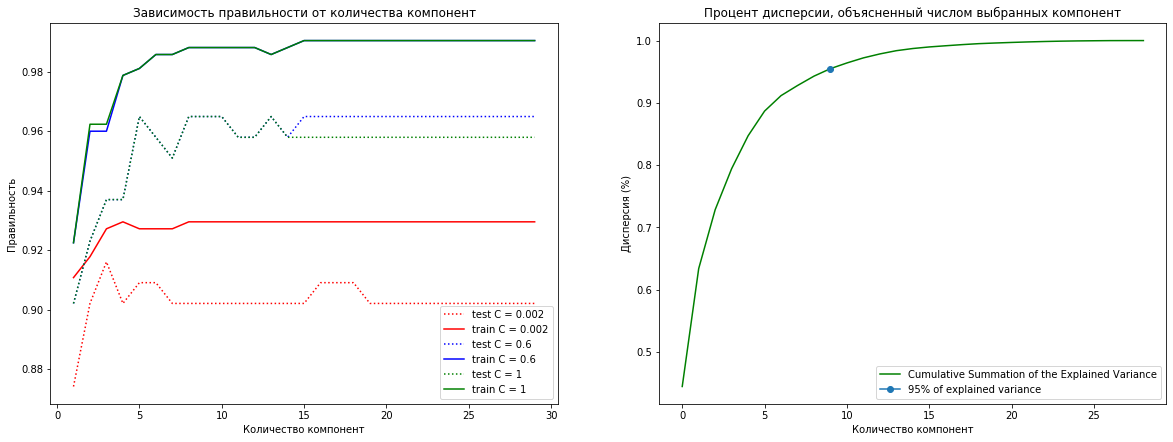

In [48]:
gridsize = (1,2)
fig = plt.figure(figsize=(20, 7))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))



components = np.arange(1,30,1)

for c, col in zip([0.002, 0.6, 1],['r','b','g']):
    train = []
    test = []
    for n_components in components:
        pca = PCA(n_components = n_components).fit(X_train_scaled)  
        X_train_pca = pca.transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
    
        log_reg = LogisticRegression(C = c)
        log_reg.fit(X_train_pca, y_train)
    
        train_score = log_reg.score(X_train_pca,y_train)
        train.append(train_score)
        test_score = log_reg.score(X_test_pca,y_test)
        test.append(test_score)
        
    ax1.plot(components,test, label = 'test C = {}'.format(c), linestyle='dotted', c = col)  
    ax1.plot(components,train, label = 'train C = {}'.format(c), c = col)
    ax1.set_xlabel('Количество компонент')
    ax1.set_ylabel('Правильность')
    ax1.legend(loc = 'best')
    ax1.set_title('Зависимость правильности от количества компонент')


point = np.argmin(np.abs(np.cumsum(pca.explained_variance_ratio_)-0.95))
ax2.plot(np.cumsum(pca.explained_variance_ratio_), label = 'Cumulative Summation of the Explained Variance', 
             c=col)
ax2.plot(components[point-1], np.cumsum(pca.explained_variance_ratio_)[point], 
             marker ='o',label = '95% of explained variance' )   
ax2.set_xlabel('Количество компонент')
ax2.set_ylabel('Дисперсия (%)') 
ax2.legend(loc = 'best')
ax2.set_title('Процент дисперсии, объясненный числом выбранных компонент')

plt.show()

In [49]:
# Теперь мы можем использовать новое представление, чтобы классифицировать данные
# используя классификатор LinearSVC
pca = PCA(n_components = 9).fit(X_train_scaled)  
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = LinearSVC(random_state=0)
clf.fit(X_train_pca,y_train)

print("Правильность на обучающем наборе: {:.2f}".format(clf.score(X_train_pca, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test_pca, y_test)))

Правильность на обучающем наборе: 0.99
Правильность на тестовом наборе: 0.96


In [50]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca,y_train)
print("Правильность на обучающем наборе: {:.2f}".format(knn.score(X_train_pca, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test_pca, y_test)))

Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 0.95
